In [17]:
from lib import transient
from lib import genericfunctions as gfs
from imp import reload
reload(transient)

import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

import pandas as pd

0.001
0.072
0.001
0.072
0.003
0.072
0.006
0.072
0.011
0.072
0.022
0.072
0.045
0.072
0.09
0.072
0.169
0.072
0.337
0.072
0.675
0.072
Imported 11 scan(s) as pump_energy dependence


()

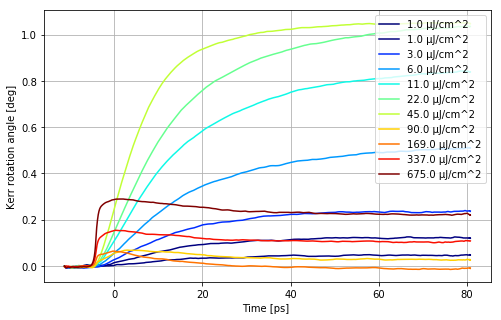

In [63]:
tr = transient.Transient()

filepath = 'E:\data\RuCl3\kerr_rotation'
pump_spot = 80
probe_spot = 50
cutFreq = 0.01 # THz
t0 = 80
key_parameter = 'pump_energy'
description = ''

###########################
# init lsits:
scanList = []
k_parameters = []

for i in range(len(files)):
    tr = transient.Transient()
    tr.import_file(filepath + files[i],cleanData=False, key_parameter = key_parameter, description=description)
    tr.pump_spot = pump_spot
    tr.probe_spot = probe_spot
    tr.calc_energy_densities()
    tr.crop_time_scale()
    tr.shift_time(t0)
    tr.filter_low_pass(cutFreq)
#     tr.flip_trace()
    tr.remove_DC_offset()
    tr.flip_time()
    tr.trace = (tr.trace - norm_file.trace) * 120
    k_parameters.append(float(getattr(tr,key_parameter)))
#     tr.trace = np.divide(tr.trace,max(tr.trace))
    scanList.append(tr)    
    
print('Imported {0} scan(s) as {1} dependence'.format(len(scanList),scanList[0].key_parameter))


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
jet = cm = plt.get_cmap('jet') 
cNormLog = colors.LogNorm(vmin=min(k_parameters), vmax=max(k_parameters))
cNorm  = colors.Normalize(vmin=min(k_parameters), vmax=max(k_parameters))
scalarMap = cmx.ScalarMappable(norm=cNormLog, cmap=jet)
lines = []
for idx in range(len(scanList)):
    colorVal = scalarMap.to_rgba(getattr(scanList[idx],key_parameter))
    retLine, = ax.plot(scanList[idx].time, scanList[idx].trace, color=colorVal)
    lines.append(retLine)
# make labels
    labels = []
for i in range(len(lines)):
    labels.append((lines[i],k_parameters[i]))
labels = sorted(labels, key=lambda kpar: float(kpar[1]))
lbLines=[]
lbVals=[]
for i in range(len(labels)):
    lbLines.append(labels[i][0])
    lbVals.append('{} µJ/cm^2'.format(labels[i][1]*1000))
ax.legend(lbLines, lbVals, loc='upper right')
# plt.xlim((-5,5))
# plt.ylim((-0.0002,0.0008))
plt.ylabel('Kerr rotation angle [deg]')
plt.xlabel('Time [ps] ')
ax.grid()
plt.savefig('e:/Steinn/Data/RuCl3/kerr rotation fluence dependence at 3,8K.png')
/

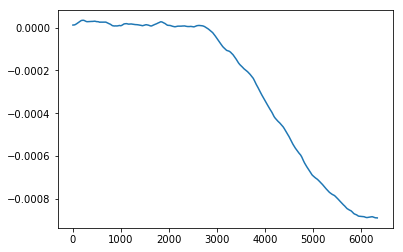

In [36]:

norm_file = transient.Transient()
norm_file.import_file('E:/data/RuCl3/2017-12-18/Ru3Cl-Pu-0.1-pr-0.2-1kAVG-T-3.8K-kerr.mat',cleanData=True, key_parameter='pump_power',description='none')
norm_file.filter_low_pass(0.004)
plt.plot(norm_file.trace)

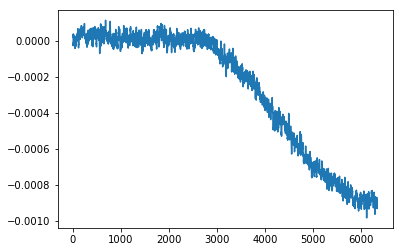

In [30]:
plt.plot(norm_file.trace)

In [49]:
csvDir = 'e:/Steinn/Data/RuCl3/'
if not os.path.isdir(csvDir):
    os.makedirs(csvDir)
for scan in scanList:
    scan.export_file_csv(csvDir)

Exporting Ru3Cl__0.005_mW
Exporting Ru3Cl__0.01_mW
Exporting Ru3Cl__0.02_mW
Exporting Ru3Cl__0.04_mW
Exporting Ru3Cl__0.08_mW
Exporting Ru3Cl__0.16_mW
Exporting Ru3Cl__0.32_mW
Exporting Ru3Cl__0.64_mW
Exporting Ru3Cl__1.2_mW
Exporting Ru3Cl__2.4_mW
Exporting Ru3Cl__4.8_mW


In [2]:
os.getcwd()


'E:\\py_code\\RegAscope2017'

{'date': '2016-12-06-20.25.46', 'material': 'backgroun'}
{'date': '2016-12-06-20.04.18', 'pump_power': 0.16, 'probe_power': 0.2, 'temperature': 3.9, 'material': 'Ru3Cl', 'other': ['1kavg', 'kerr']}
0.022
0.072
{'date': '2016-12-06-20.12.18', 'pump_power': 0.16, 'probe_power': 0.2, 'temperature': 5.0, 'material': 'Ru3Cl', 'other': ['1kavg', 'kerr']}
0.022
0.072
{'date': '2016-12-06-20.16.14', 'pump_power': 0.16, 'probe_power': 0.2, 'temperature': 6.0, 'material': 'Ru3Cl', 'other': ['1kavg', 'kerr']}
0.022
0.072
{'date': '2016-12-06-20.20.28', 'pump_power': 0.16, 'probe_power': 0.2, 'temperature': 7.0, 'material': 'Ru3Cl', 'other': ['1kavg', 'kerr']}
0.022
0.072
Imported 4 scan(s) as temperature dependence


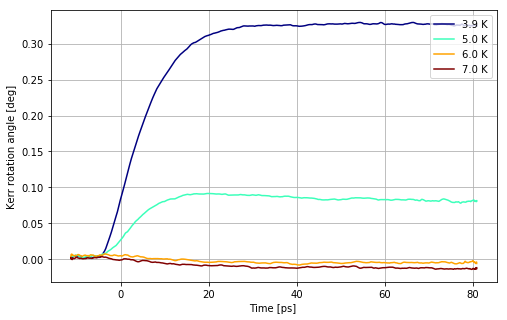

In [27]:
tr = transient.Transient()

filepath = 'E:/data/RuCl3/kerr_rotation/temperature_160uW/'
pump_spot = 80
probe_spot = 50
cutFreq = 0.01 # THz
t0 = 80
key_parameter = 'temperature'
description = ''

###########################
# init lsits:
scanList = []
k_parameters = []
files = os.listdir(filepath)

for i in range(len(files)):
    print(gfs.get_metadata_from_name(filepath + files[i]))

    if files[i] == 'background.mat':
        norm_file = transient.Transient()
        norm_file.import_file(filepath + files[i],cleanData=True, key_parameter='pump_power',description='none')
        norm_file.filter_low_pass(0.004)
# plt.plot(norm_file.trace)
    else:
                
        tr = transient.Transient()
        tr.import_file(filepath + files[i],cleanData=False, key_parameter = key_parameter, description=description)
        tr.pump_spot = pump_spot
        tr.probe_spot = probe_spot
        tr.calc_energy_densities()
        tr.crop_time_scale()
        tr.shift_time(t0)
        tr.filter_low_pass(cutFreq)
    #     tr.flip_trace()
        tr.remove_DC_offset()
        tr.flip_time()
        tr.trace = (tr.trace - norm_file.trace) * 120
        k_parameters.append(float(getattr(tr,key_parameter)))
    #     tr.trace = np.divide(tr.trace,max(tr.trace))
        scanList.append(tr)    
    
print('Imported {0} scan(s) as {1} dependence'.format(len(scanList),scanList[0].key_parameter))


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
jet = cm = plt.get_cmap('jet') 
cNormLog = colors.LogNorm(vmin=min(k_parameters), vmax=max(k_parameters))
cNorm  = colors.Normalize(vmin=min(k_parameters), vmax=max(k_parameters))
scalarMap = cmx.ScalarMappable(norm=cNormLog, cmap=jet)
lines = []
for idx in range(len(scanList)):
    colorVal = scalarMap.to_rgba(getattr(scanList[idx],key_parameter))
    retLine, = ax.plot(scanList[idx].time, scanList[idx].trace, color=colorVal)
    lines.append(retLine)
# make labels
    labels = []
for i in range(len(lines)):
    labels.append((lines[i],k_parameters[i]))
labels = sorted(labels, key=lambda kpar: float(kpar[1]))
lbLines=[]
lbVals=[]
for i in range(len(labels)):
    lbLines.append(labels[i][0])
    lbVals.append('{} K'.format(labels[i][1]))
ax.legend(lbLines, lbVals, loc='upper right')
# plt.xlim((-5,5))
# plt.ylim((-0.0002,0.0008))
plt.ylabel('Kerr rotation angle [deg]')
plt.xlabel('Time [ps] ')
ax.grid()
plt.savefig('e:/Data/RuCl3/kerr rotation temperature.png')

{'date': '2016-12-06-19.29.52', 'pump_power': 0.005, 'probe_power': 0.2, 'material': 'Ru3Cl', 'other': ['1kavg', 't', '12k', 'kerr']}
0.001
0.072
{'date': '2016-12-06-19.32.42', 'pump_power': 0.01, 'probe_power': 0.2, 'material': 'Ru3Cl', 'other': ['1kavg', 't', '12k', 'kerr']}
0.001
0.072
{'date': '2016-12-06-19.35.04', 'pump_power': 0.02, 'probe_power': 0.2, 'material': 'Ru3Cl', 'other': ['1kavg', 't', '12k', 'kerr']}
0.003
0.072
{'date': '2016-12-06-19.37.34', 'pump_power': 0.04, 'probe_power': 0.2, 'material': 'Ru3Cl', 'other': ['1kavg', 't', '12k', 'kerr']}
0.006
0.072
{'date': '2016-12-06-19.40.20', 'pump_power': 0.08, 'probe_power': 0.2, 'material': 'Ru3Cl', 'other': ['1kavg', 't', '12k', 'kerr']}
0.011
0.072
{'date': '2016-12-06-19.42.56', 'pump_power': 0.16, 'probe_power': 0.2, 'material': 'Ru3Cl', 'other': ['1kavg', 't', '12k', 'kerr']}
0.022
0.072
{'date': '2016-12-06-19.45.32', 'pump_power': 0.32, 'probe_power': 0.2, 'material': 'Ru3Cl', 'other': ['1kavg', 't', '12k', 'kerr

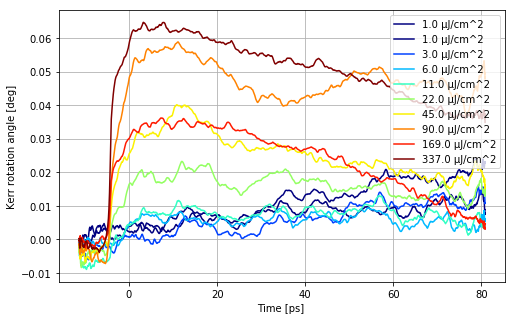

In [44]:
tr = transient.Transient()

filepath = 'E:/data/RuCl3/kerr_rotation/fluence_12K/'
pump_spot = 80
probe_spot = 50
cutFreq = 0.01 # THz
t0 = 80
key_parameter = 'pump_energy'
description = ''

###########################
# init lsits:
scanList = []
k_parameters = []
files = os.listdir(filepath)

for i in range(len(files)):
    print(gfs.get_metadata_from_name(filepath + files[i]))

    if files[i] == 'background.mat':
        norm_file = transient.Transient()
        norm_file.import_file(filepath + files[i],cleanData=True, key_parameter='pump_power',description='none')
        norm_file.filter_low_pass(0.004)
# plt.plot(norm_file.trace)
    else:
                
        tr = transient.Transient()
        tr.import_file(filepath + files[i],cleanData=False, key_parameter = key_parameter, description=description)
        tr.pump_spot = pump_spot
        tr.probe_spot = probe_spot
        tr.calc_energy_densities()
        tr.crop_time_scale()
        tr.shift_time(t0)
        tr.filter_low_pass(cutFreq)
    #     tr.flip_trace()
        tr.remove_DC_offset()
        tr.flip_time()
        if i <8:
            tr.trace = (tr.trace - norm_file.trace) * 120
        else:
            tr.trace = (tr.trace) * 120

        k_parameters.append(float(getattr(tr,key_parameter)))
#         tr.trace = np.divide(tr.trace,max(tr.trace))
#         tr.trace = np.divide(tr.trace,max(tr.trace))

        scanList.append(tr)    
    
print('Imported {0} scan(s) as {1} dependence'.format(len(scanList),scanList[0].key_parameter))


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
jet = cm = plt.get_cmap('jet') 
cNormLog = colors.LogNorm(vmin=min(k_parameters), vmax=max(k_parameters))
cNorm  = colors.Normalize(vmin=min(k_parameters), vmax=max(k_parameters))
scalarMap = cmx.ScalarMappable(norm=cNormLog, cmap=jet)
lines = []
for idx in range(len(scanList)):
    colorVal = scalarMap.to_rgba(getattr(scanList[idx],key_parameter))
    retLine, = ax.plot(scanList[idx].time, scanList[idx].trace, color=colorVal)
    lines.append(retLine)
# make labels
    labels = []
for i in range(len(lines)):
    labels.append((lines[i],k_parameters[i]))
labels = sorted(labels, key=lambda kpar: float(kpar[1]))
lbLines=[]
lbVals=[]
for i in range(len(labels)):
    lbLines.append(labels[i][0])
    lbVals.append('{} µJ/cm^2'.format(labels[i][1]*1000))
ax.legend(lbLines, lbVals, loc='upper right')
# plt.xlim((-5,5))
# plt.ylim((-0.0002,0.0008))
plt.ylabel('Kerr rotation angle [deg]')
plt.xlabel('Time [ps] ')
ax.grid()
plt.savefig('e:/Data/RuCl3/kerr rotation power - 12K norm.png')